Point after epoch 0: array([ 2., 16.])
Point after epoch 1: array([   0., -224.])
Point after epoch 2: array([2.000e+00, 3.376e+03])
Point after epoch 3: array([     0., -50624.])
Point after epoch 4: array([2.00000e+00, 7.59376e+05])
Point after epoch 5: array([        0., -11390624.])
Point after epoch 6: array([2.00000000e+00, 1.70859376e+08])
Point after epoch 7: array([ 0.00000000e+00, -2.56289062e+09])
Point after epoch 8: array([2.00000000e+00, 3.84433594e+10])
Point after epoch 9: array([ 0.00000000e+00, -5.76650391e+11])
Point after epoch 10: array([2.00000000e+00, 8.64975586e+12])
Point after epoch 11: array([ 0.00000000e+00, -1.29746338e+14])
Point after epoch 12: array([2.00000000e+00, 1.94619507e+15])
Point after epoch 13: array([ 0.0000000e+00, -2.9192926e+16])
Point after epoch 14: array([2.0000000e+00, 4.3789389e+17])
Point after epoch 15: array([ 0.00000000e+00, -6.56840836e+18])
Point after epoch 16: array([2.00000000e+00, 9.85261253e+19])
Point after epoch 17: array(

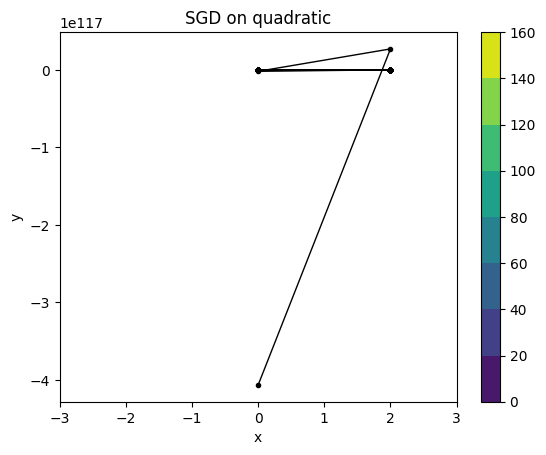

: 

In [ ]:
# optimization.py

import argparse
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

###
# IMPLEMENT ME! REPLACE WITH YOUR ANSWER TO PART 1B
OPTIMAL_STEP_SIZE = 10.0
###


def _parse_args():
    """
    Command-line arguments to the system.
    :return: the parsed args bundle
    """
    parser = argparse.ArgumentParser(description='optimization.py')
    parser.add_argument('--func', type=str, default='QUAD',
                        help='function to optimize (QUAD or NN)')
    parser.add_argument('--lr', type=float, default=1., help='learning rate')
    parser.add_argument('--weight_decay', type=float,
                        default=0., help='weight decay')
    parser.add_argument('--epochs', type=int, default=100,
                        help='number of epochs')
    args = parser.parse_args()
    return args


def quadratic(x1, x2):
    """
    Quadratic function of two variables
    :param x1: first coordinate
    :param x2: second coordinate
    :return:
    """
    return (x1 - 1) ** 2 + 8 * (x2 - 1) ** 2


def quadratic_grad(x1, x2):
    """
    Should return a numpy array containing the gradient of the quadratic function defined above evaluated at the point
    :param x1: first coordinate
    :param x2: second coordinate
    :return: a one-dimensional numpy array containing two elements representing the gradient
    """

    return np.array([2*(x1 - 1), 16*(x2 - 1)])


def sgd_test_quadratic(args):
    xlist = np.linspace(-3.0, 3.0, 100)
    ylist = np.linspace(-3.0, 3.0, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = quadratic(X, Y)
    plt.figure()

    # Track the points visited here
    points_history = []
    curr_point = np.array([0., 0.])
    for iter in range(0, args.epochs):
        grad = quadratic_grad(curr_point[0], curr_point[1])
        if len(grad) != 2:
            raise Exception(
                "Gradient must be a two-dimensional array (vector containing [df/dx1, df/dx2])")
        next_point = curr_point - args.lr * grad
        points_history.append(curr_point)
        print("Point after epoch %i: %s" % (iter, repr(next_point)))
        curr_point = next_point
    points_history.append(curr_point)
    cp = plt.contourf(X, Y, Z)
    plt.colorbar(cp)
    plt.plot([p[0] for p in points_history], [p[1] for p in points_history],
             color='k', linestyle='-', linewidth=1, marker=".")
    plt.title('SGD on quadratic')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    exit()


if __name__ == '__main__':
    args = _parse_args()
    sgd_test_quadratic(args)
